In [136]:
import time
# Start the timer
start_time = time.time()


In [137]:
from PIL import Image
import numpy as np
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2
import random
from math import log
from google.colab.patches import cv2_imshow
from tqdm import tqdm

In [138]:
# Downloading HorizonZero.png
# !wget https://drive.google.com/file/d/1sFiPpSapIRAGlT5ZZhAsMfipq2nDypdx/view?usp=drivesdk
# !mv view?usp=drive_link HorizonZero.png
#!wget https://drive.google.com/uc?id=1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm
#!mv uc?id=1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm HorizonZero.png
!mv /content/images.png HorizonZero.png
# Downloading lena.bmp
!wget https://drive.google.com/uc?id=19xZhsjs_r0tLwtu_Wl5DB5rG26dhw069
!mv uc?id=19xZhsjs_r0tLwtu_Wl5DB5rG26dhw069 lena.bmp

--2023-07-09 11:32:53--  https://drive.google.com/uc?id=19xZhsjs_r0tLwtu_Wl5DB5rG26dhw069
Resolving drive.google.com (drive.google.com)... 173.194.218.139, 173.194.218.138, 173.194.218.113, ...
Connecting to drive.google.com (drive.google.com)|173.194.218.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-40-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/oeuej4jcv9hsr4o1nd1mguaiqq3ahv0r/1688902350000/05356688754188258246/*/19xZhsjs_r0tLwtu_Wl5DB5rG26dhw069?uuid=4289e829-309d-47ba-8712-a42c5fc203ad [following]
--2023-07-09 11:32:53--  https://doc-10-40-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/oeuej4jcv9hsr4o1nd1mguaiqq3ahv0r/1688902350000/05356688754188258246/*/19xZhsjs_r0tLwtu_Wl5DB5rG26dhw069?uuid=4289e829-309d-47ba-8712-a42c5fc203ad
Resolving doc-10-40-docs.googleusercontent.com (doc-10-40-docs.googleusercontent.com)... 142.251.162.132, 2607:f8b0:400c:c02::84
Connecting to d

In [139]:
def getImageMatrix(imageName):
    im = Image.open(imageName)
    pix = im.load()
    color = 1
    if type(pix[0,0]) == int:
      color = 0
    image_size = im.size
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix, image_size[0], image_size[1],color



In [140]:
def getImageMatrix_gray(imageName):
    im = Image.open(imageName).convert('LA')
    pix = im.load()
    image_size = im.size
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix, image_size[0], image_size[1],color


In [141]:
#Arnold Cat
# def ArnoldCatTransform(img, num):
#     rows, cols, ch = img.shape
#     n = rows
#     img_arnold = np.zeros([rows, cols, ch])
#     for x in range(0, rows):
#         for y in range(0, cols):
#             img_arnold[x][y] = img[(x+y)%n][(x+2*y)%n]
#     return img_arnold
def ArnoldCatTransform(img, num):
    rows, cols = img.shape[:2]
    img_arnold = np.zeros_like(img)

    for x in range(rows):
        for y in range(cols):
            img_arnold[x][y] = img[(x+y)%rows][(x+2*y)%cols]

    return img_arnold


In [142]:
#Arnold Cat Encryption


def ArnoldCatEncryption(imageName, key):
    img = cv2.imread(imageName)
    for i in range (0,key):
        img = ArnoldCatTransform(img, i)
    cv2.imwrite(imageName.split('.')[0] + "_ArnoldcatEnc.png", img)
    return img

In [143]:
#Arnold Cat Decryption


def ArnoldCatDecryption(imageName, key):
    img = cv2.imread(imageName)
    rows, cols, ch = img.shape
    dimension = rows
    decrypt_it = dimension
    if (dimension%2==0) and 5**int(round(log(dimension/2,5))) == int(dimension/2):
        decrypt_it = 3*dimension
    elif 5**int(round(log(dimension,5))) == int(dimension):
        decrypt_it = 2*dimension
    elif (dimension%6==0) and  5**int(round(log(dimension/6,5))) == int(dimension/6):
        decrypt_it = 2*dimension
    else:
        decrypt_it = int(12*dimension/7)
    for i in range(key,decrypt_it):
        img = ArnoldCatTransform(img, i)
    cv2.imwrite(imageName.split('_')[0] + "_ArnoldcatDec.png",img)
    return img

In [144]:
image = "HorizonZero"
ext = ".png"
key = 20


In [145]:
import cv2

In [146]:
from google.colab.patches import cv2_imshow

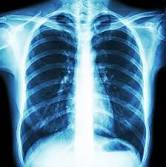

In [147]:
img = cv2.imread(image+ext)
cv2_imshow(img)

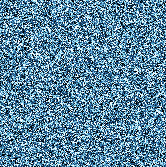

In [148]:
ArnoldCatEncryptionIm = ArnoldCatEncryption(image + ext, key)
cv2_imshow(ArnoldCatEncryptionIm)



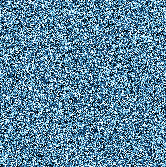

In [149]:
ArnoldCatDecryptionIm = ArnoldCatDecryption(image + "_ArnoldcatEnc.png", key)
cv2_imshow(ArnoldCatDecryptionIm)


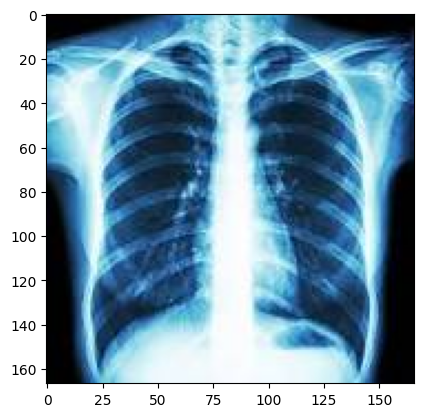

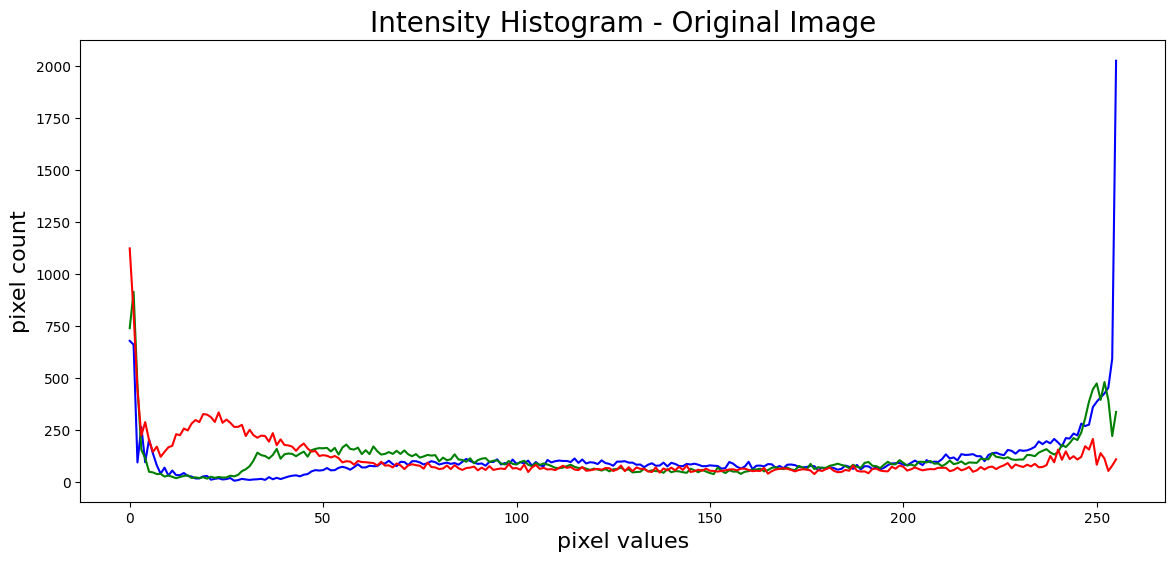

In [150]:
image = "HorizonZero"
ext = ".png"
img = cv2.imread(image + ext,1)
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))

plt.figure(figsize=(14,6))
histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue')
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256])
plt.plot(histogram_green, color='green')
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256])
plt.plot(histogram_red, color='red')
plt.title('Intensity Histogram - Original Image', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16)
plt.show()

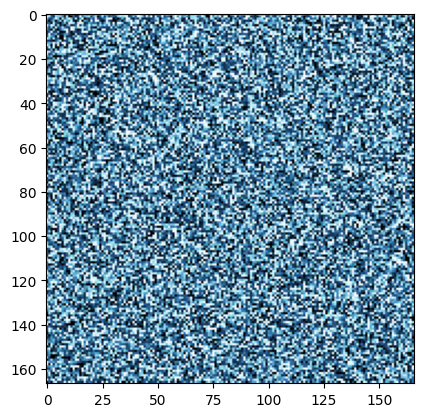

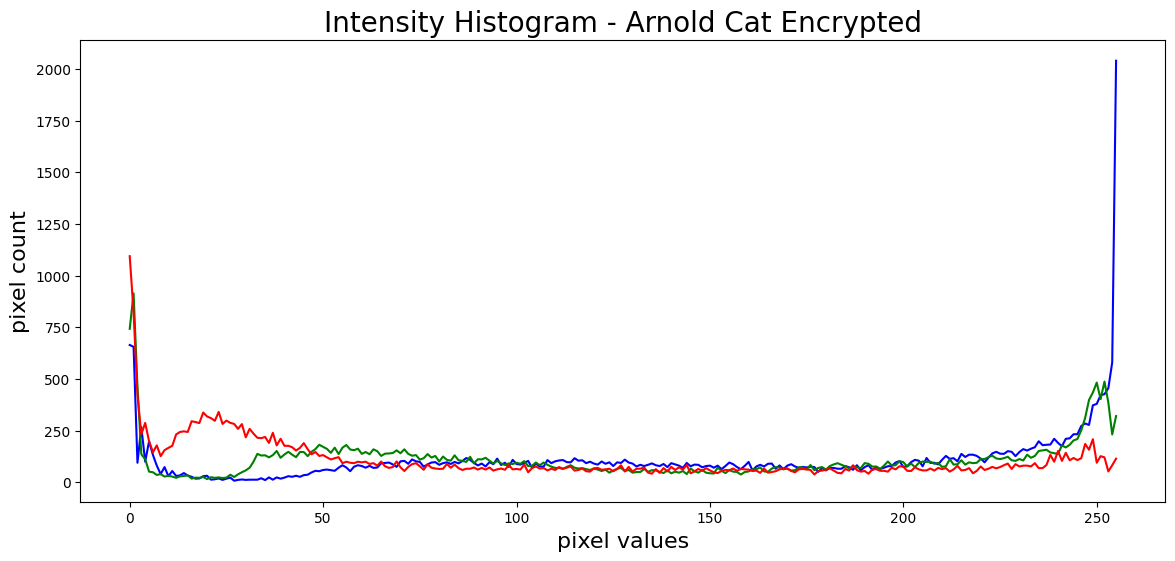

In [151]:
image = "HorizonZero_ArnoldcatEnc"
ext = ".png"
img = cv2.imread(image + ext,1)
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))

plt.figure(figsize=(14,6))
histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue')
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256])
plt.plot(histogram_green, color='green')
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256])
plt.plot(histogram_red, color='red')
plt.title('Intensity Histogram - Arnold Cat Encrypted', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16)
plt.show()

In [152]:


# Stop the timer
end_time = time.time()

# Calculate the running time
running_time = end_time - start_time
print("Running Time: {:.2f} seconds".format(running_time))


Running Time: 11.84 seconds


In [153]:
#Time Complexity: O(N^2)

In [155]:


# Calculate accuracy
accuracy = np.sum(np.abs(image_matrix - decrypted_image)) / (image_width * image_height)

# Print the accuracy
print("Accuracy: {:.2f}%".format((1 - accuracy) * 100))

# Display the images
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 3, 1)
# plt.imshow(image_matrix)
# plt.title("Original Image")
# plt.axis("off")

# plt.subplot(1, 3, 2)
# plt.imshow(encrypted_image)
# plt.title("Encrypted Image")
# plt.axis("off")

# plt.subplot(1, 3, 3)
# plt.imshow(decrypted_image)
# plt.title("Decrypted Image")
# plt.axis("off")

# plt.tight_layout()
# plt.show()

# Stop the timer
end_time = time.time()

# Calculate the running time
running_time = end_time - start_time
print("Running Time: {:.2f} seconds".format(running_time))


Accuracy: -21471.03%
Running Time: 74.61 seconds
